In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df3 = pd.read_table('./data/TWR_C_2nd_cook_03m_fft1.txt', delim_whitespace=True, index_col=0,
                  names=['Frac', 'U', 'V', 'W', 'T', 'year', 'mon', 'day', 'hour', 'min', 'tenth'])
df10 = pd.read_table('./data/TWR_C_2nd_cook_10m_fft1.txt', delim_whitespace=True, index_col=0,
                  names=['Frac', 'U', 'V', 'W', 'T', 'year', 'mon', 'day', 'hour', 'min', 'tenth'])
df20 = pd.read_table('./data/TWR_C_2nd_cook_20m_fft1.txt', delim_whitespace=True, index_col=0,
                  names=['Frac', 'U', 'V', 'W', 'T', 'year', 'mon', 'day', 'hour', 'min', 'tenth'])

In [3]:
# df[np.logical_and(df['hour']==16, df['min']==9)]

# df.iloc[535431:580431]

In [47]:
# pre mean
t = []
w = []
wt = []

df = [df3, df10, df20]
for hi in range(3):
    df_pre = df[hi].iloc[535431:553431] #pre
    df_ffp = df[hi].iloc[553431:562431] #ffp
    df_pos = df[hi].iloc[562431:580431] #post
    
    t_premean = df_pre['T'].mean()
    t.append(df_pre['T'] - t_premean)
    t.append(df_ffp['T'] - t_premean)
    t.append(df_pos['T'] - t_premean)
    
    w_premean = df_pre['W'].mean()
    w.append(df_pre['W'] - w_premean)
    w.append(df_ffp['W'] - w_premean)
    w.append(df_pos['W'] - w_premean)

    wt.append((df_pre['T'] - t_premean) * (df_pre['W'] - w_premean))
    wt.append((df_ffp['T'] - t_premean) * (df_ffp['W'] - w_premean))
    wt.append((df_pos['T'] - t_premean) * (df_pos['W'] - w_premean))

data = [t, w, wt]

In [42]:
# period mean
t = []
w = []
wt = []

df = [df3, df10, df20]
for hi in range(3):
    df_pre = df[hi].iloc[535431:553431] #pre
    df_ffp = df[hi].iloc[553431:562431] #ffp
    df_pos = df[hi].iloc[562431:580431] #post
    
    t.append(df_pre['T'] - df_pre['T'].mean())
    t.append(df_ffp['T'] - df_ffp['T'].mean())
    t.append(df_pos['T'] - df_pos['T'].mean())
    
    w.append(df_pre['W'] - df_pre['W'].mean())
    w.append(df_ffp['W'] - df_ffp['W'].mean())
    w.append(df_pos['W'] - df_pos['W'].mean())

    wt.append((df_pre['T'] - df_pre['T'].mean()) * (df_pre['W'] - df_pre['W'].mean()))
    wt.append((df_ffp['T'] - df_ffp['T'].mean()) * (df_ffp['W'] - df_ffp['W'].mean()))
    wt.append((df_pos['T'] - df_pos['T'].mean()) * (df_pos['W'] - df_pos['W'].mean()))

data = [t, w, wt]

In [8]:
color = ['r', 'b', 'lime']
start = '14:55:00'
ffps = '15:25:00'
ffpe = '15:40:00'
end = '16:10:00'
tower = 'Control'
ylabel = ["t' (\u2103)", "w' (m/s)", "w't' (m\u2103/s)"]
yl = -5, -4, -2
yr = 5, 4, 4
step = 2, 2, 2

legend = ['19m AGL', '10m AGL', '3m AGL', 'Fire Starts', 'Fire Ends']
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for vi in range(3):
    ax = plt.subplot(3,1,vi+1)
    ax.set_ylim(yl[vi], yr[vi])
    plt.yticks(np.arange(yl[vi], yr[vi]+1, step[vi]), fontsize='large')
    ax.set_xlim(-10, 485)
    ax.set_ylabel(ylabel[vi], fontsize='large', fontweight='bold')
    if vi == 2:
        ax.set_xlabel("Time", fontsize='large', fontweight='bold')
    for hi in [2,1,0]:
        wwpre = data[vi][3*hi]
        xpre = len(wwpre)

        wwffp = data[vi][3*hi+1]
        xffp = len(wwffp)

        wwpos = data[vi][3*hi+2]
        xpos = len(wwpos)

        plt.scatter(np.arange(xpre), wwpre, .5, color[hi], alpha=1.)
        plt.scatter(np.arange(xpre, xpre+xffp), wwffp, .5, color[hi], alpha=1., label='_nolegend_')
        plt.scatter(np.arange(xpre+xffp, xpre+xffp+xpos), wwpos, .5, color[hi], alpha=1., label='_nolegend_')
    plt.vlines(xpre, yl[vi], yr[vi], 'magenta', linestyle='--', lw=1)
    plt.vlines(xpre+xffp, yl[vi], yr[vi], 'cyan', linestyle='--', lw=1) 
    plt.hlines(0, 0, xpre+xffp+xpos, 'grey', lw=1)
    plt.xticks(np.arange(0, xpre+xffp+xpos, 1000), [])
    plt.text(0, -.08, start, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(.41, -.08, ffps, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(.62, -.08, ffpe, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(1, -.08, end, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.legend(legend, fontsize='large', markerscale=3., ncol=2, frameon=False)
    
plt.suptitle(f"Time Series at Control Tower (Period-Mean)", fontsize=15, fontweight='bold', x=.5, y=.9)
plt.savefig(f'./plot/Control_TimeSeries_periodmean.png', bbox_inches='tight')
plt.close()

## scatter plot

In [48]:
SweepC = [np.logical_and(w[i]<0, t[i]<0).sum() for i in range(9)]
EjectionC = [np.logical_and(w[i]>0, t[i]>0).sum() for i in range(9)]
OutwardC = [np.logical_and(w[i]>0, t[i]<0).sum() for i in range(9)]
InwardC = [np.logical_and(w[i]<0, t[i]>0).sum() for i in range(9)]

SweepMean = [np.where(np.logical_and(w[i]<0, t[i]<0), w[i]*t[i], 0).sum() / SweepC[i] for i in range(9)]
EjectionMean = [np.where(np.logical_and(w[i]>0, t[i]>0), w[i]*t[i], 0).sum() / EjectionC[i] for i in range(9)]
OutwardMean = [np.where(np.logical_and(w[i]>0, t[i]<0), w[i]*t[i], 0).sum() / OutwardC[i] for i in range(9)]
InwardMean = [np.where(np.logical_and(w[i]<0, t[i]>0), w[i]*t[i], 0).sum() / InwardC[i] for i in range(9)]

OutwardFra = [OutwardC[i] / len(w[i]) for i in range(9)]
EjectionFra = [EjectionC[i] / len(w[i]) for i in range(9)]
InwardFra = [InwardC[i] / len(w[i]) for i in range(9)]
SweepFra = [SweepC[i] / len(w[i]) for i in range(9)]

In [21]:
color = ['lime', 'r', 'k']
xl = [-4, -4, -4]
xr = [4, 4, 4]
yl = [-4, -4, -4]
yr = [4, 4, 4]
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for hi in range(3):
    for pi in range(3):
        ax = plt.subplot(3,3,hi*3+pi+1)
        plt.scatter(t[hi*3+pi], w[hi*3+pi], c=color[pi], s=1)
        plt.xlim(xl[pi], xr[pi])
        plt.ylim(yl[pi], yr[pi])
#         if pi == 0:
#             plt.xticks(np.arange(xl[pi], xr[pi]+3, 3))
        plt.hlines(0, xl[pi], xr[pi], 'c', lw=1)
        plt.vlines(0, yl[pi], yr[pi], 'c', lw=1)
        plt.ylabel("w' (m/s)", fontweight='bold')
        plt.xlabel("t' (\u2103)", fontweight='bold')
        
        if hi == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        
        if pi == 2:
            if hi == 0:
                plt.text(1.09, .9, '3-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 1:
                plt.text(1.09, .9, '10-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 2:
                plt.text(1.09, .9, '19-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        
        plt.text(.25, .96, 'Outward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .89, "$\overline{w^{'}t^{'}}$ = "+f"{OutwardMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .83, f"Fration = {OutwardFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.1, .2, 'Sweep', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .12, "$\overline{w^{'}t^{'}}$ = "+f"{SweepMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .05, f"Fration = {SweepFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.77, .2, 'Inward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.82, .12, "$\overline{w^{'}t^{'}}$ = "+f"{InwardMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.80, .05, f"Fration = {InwardFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.85, .96, 'Ejection', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.82, .89, "$\overline{w^{'}t^{'}}$ = "+f"{EjectionMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.80, .83, f"Fration = {EjectionFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
# plt.suptitle('Scatter plot at the Control tower (Pre-Mean)', fontsize='large', fontweight='bold', x=.5, y=.92)
# plt.savefig('./plot/Control_scatterplot_premean.png', bbox_inches='tight')
plt.suptitle('Scatter plot at the Control tower (Period-Mean)', fontsize='large', fontweight='bold', x=.5, y=.92)
plt.savefig('./plot/Control_scatterplot_periodmean.png', bbox_inches='tight')

## Contribution bar and vertical profile

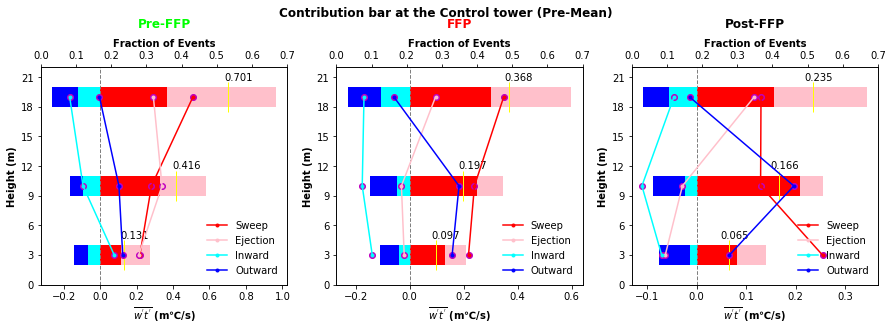

In [49]:
# height(3,10,20), period(Pre, FFP, Post), event(Sweep, Ejection, Inward, Outward)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
Y = [3, 10, 19]
HeatMean = np.array(SweepMean) + np.array(EjectionMean) + np.array(InwardMean) + np.array(OutwardMean)
for pi in range(3):
    ax = plt.subplot(1,3,pi+1)
    plt.barh(Y, np.array(SweepMean[pi::3])+np.array(EjectionMean[pi::3]), align='center', height=2, color='pink')
    plt.barh(Y, np.array(SweepMean[pi::3]), align='center', height=2, color='red')
    plt.barh(Y, np.array(InwardMean[pi::3])+np.array(OutwardMean[pi::3]), align='center', height=2, color='b')
    plt.barh(Y, np.array(InwardMean[pi::3]), align='center', height=2, color='cyan')
#     plt.legend(['Ejection', 'Sweep', 'Inward Interaction', 'Outward Interaction'], loc='best', frameon=False)
    plt.vlines(HeatMean[pi], 1.5, 4.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi]-.018, 4.7, f'{HeatMean[pi]:.3f}')
    plt.vlines(HeatMean[pi+3], 8.5, 11.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi+3]-.018, 11.7, f'{HeatMean[pi+3]:.3f}')
    plt.vlines(HeatMean[pi+6], 17.5, 20.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi+6]-.018, 20.7, f'{HeatMean[pi+6]:.3f}')
    plt.vlines(0, 0, 22, lw=1, ls='dashed', color='grey')
# #     plt.xlim(xl, xr)
    plt.ylim(0, 22)
    plt.xlabel("$\overline{w^{'}t^{'}}$ (m\u2103/s)", fontweight='bold')
    plt.ylabel("Height (m)", fontweight='bold')
    
    if pi == 0:
        plt.text(.5, 1.2, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    elif pi == 1:
        plt.text(.5, 1.2, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    elif pi == 2:
        plt.text(.5, 1.2, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    
    axx = ax.twiny()
    axx.plot(SweepFra[pi::3], Y, 'r-o', ms=3)
    axx.scatter(SweepFra[pi::3], Y, color='m')
    axx.plot(EjectionFra[pi::3], Y, c='pink', ls='-', marker='o', ms=3)
    axx.scatter(EjectionFra[pi::3], Y, color='m')
    axx.plot(InwardFra[pi::3], Y, c='cyan', ls='-', marker='o', ms=3)
    axx.scatter(InwardFra[pi::3], Y, color='m')
    axx.plot(OutwardFra[pi::3], Y, 'b-o', ms=3)
    axx.scatter(OutwardFra[pi::3], Y, color='m')
    axx.set_xlim(0, .7)
    axx.set_xlabel('Fraction of Events', fontweight='bold')
    axx.set_yticks(np.arange(0,22,3))
    plt.legend(['Sweep', 'Ejection', 'Inward', 'Outward'], loc='lower right', frameon=False)
# plt.suptitle('Contribution bar at the Control tower (Period-Mean)', fontsize='large', fontweight='bold', x=.5, y=1.09)
# plt.savefig('./plot/Control_ContributionProfile_periodmean.png', bbox_inches='tight')
plt.suptitle('Contribution bar at the Control tower (Pre-Mean)', fontsize='large', fontweight='bold', x=.5, y=1.09)
plt.savefig('./plot/Control_ContributionProfile_premean.png', bbox_inches='tight')

## Flux tower

In [3]:
tower = ['East', 'Flux', 'North', 'South', 'West']
ti = 1
df3 = pd.ExcelFile(f'./data/PeriodMean/3m/2019_{tower[ti]}_Tower-fft_3mAGL.xlsx')
df10 = pd.ExcelFile(f'./data/PeriodMean/10m/2019_{tower[ti]}_Tower-fft_10mAGL.xlsx')
df20 = pd.ExcelFile(f'./data/PeriodMean/20m/2019_{tower[ti]}_Tower-fft_20mAGL.xlsx')

In [4]:
# pre mean
t = []
w = []
wt = []

df = [df3, df10, df20]
for hi in range(3):
    df_pre = pd.read_excel(df[hi], 'Pre-FFP')
    df_ffp = pd.read_excel(df[hi], 'FFP')
    df_pos = pd.read_excel(df[hi], 'Post-FFP')
    
    t_premean = df_pre['T (C)'].mean()
    t.append(df_pre['T (C)'] - t_premean)
    t.append(df_ffp['T (C)'] - t_premean)
    t.append(df_pos['T (C)'] - t_premean)
    
    w_premean = df_pre['W (m/s)'].mean()
    w.append(df_pre['W (m/s)'] - w_premean)
    w.append(df_ffp['W (m/s)'] - w_premean)
    w.append(df_pos['W (m/s)'] - w_premean)

    wt.append((df_pre['T (C)'] - t_premean) * (df_pre['W (m/s)'] - w_premean))
    wt.append((df_ffp['T (C)'] - t_premean) * (df_ffp['W (m/s)'] - w_premean))
    wt.append((df_pos['T (C)'] - t_premean) * (df_pos['W (m/s)'] - w_premean))

data = [t, w, wt]

In [11]:
# period mean
t = []
w = []
wt = []

df = [df3, df10, df20]
for hi in range(3):
    df_pre = pd.read_excel(df[hi], 'Pre-FFP')
    df_ffp = pd.read_excel(df[hi], 'FFP')
    df_pos = pd.read_excel(df[hi], 'Post-FFP')

    t.append(df_pre['T (C)'] - df_pre['T (C)'].mean())
    t.append(df_ffp['T (C)'] - df_ffp['T (C)'].mean())
    t.append(df_pos['T (C)'] - df_pos['T (C)'].mean())

    w.append(df_pre['W (m/s)'] - df_pre['W (m/s)'].mean())
    w.append(df_ffp['W (m/s)'] - df_ffp['W (m/s)'].mean())
    w.append(df_pos['W (m/s)'] - df_pos['W (m/s)'].mean())

    wt.append((df_pre['T (C)'] - df_pre['T (C)'].mean()) * (df_pre['W (m/s)'] - df_pre['W (m/s)'].mean()))
    wt.append((df_ffp['T (C)'] - df_ffp['T (C)'].mean()) * (df_ffp['W (m/s)'] - df_ffp['W (m/s)'].mean()))
    wt.append((df_pos['T (C)'] - df_pos['T (C)'].mean()) * (df_pos['W (m/s)'] - df_pos['W (m/s)'].mean()))

data = [t, w, wt]

In [12]:
color = ['r', 'b', 'lime']
start = '14:55:00'
ffps = '15:25:00'
ffpe = '15:40:00'
end = '16:10:00'
tower = 'Flux'
ylabel = ["t' (\u2103)", "w' (m/s)", "w't' (m\u2103/s)"]
yl = -5, -8, -100
yr = 95, 8, 300
step = 20, 4, 80

legend = ['19m AGL', '10m AGL', '3m AGL', 'Fire Starts', 'Fire Ends']
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for vi in range(3):
    ax = plt.subplot(3,1,vi+1)
    ax.set_ylim(yl[vi], yr[vi])
    plt.yticks(np.arange(yl[vi], yr[vi]+1, step[vi]), fontsize='large')
    ax.set_xlim(-10, 485)
    ax.set_ylabel(ylabel[vi], fontsize='large', fontweight='bold')
    if vi == 2:
        ax.set_xlabel("Time", fontsize='large', fontweight='bold')
    for hi in [2,1,0]:
        wwpre = data[vi][3*hi]
        xpre = len(wwpre)

        wwffp = data[vi][3*hi+1]
        xffp = len(wwffp)

        wwpos = data[vi][3*hi+2]
        xpos = len(wwpos)

        plt.scatter(np.arange(xpre), wwpre, .5, color[hi], alpha=1.)
        plt.scatter(np.arange(xpre, xpre+xffp), wwffp, .5, color[hi], alpha=1., label='_nolegend_')
        plt.scatter(np.arange(xpre+xffp, xpre+xffp+xpos), wwpos, .5, color[hi], alpha=1., label='_nolegend_')
    plt.vlines(xpre, yl[vi], yr[vi], 'magenta', linestyle='--', lw=1)
    plt.vlines(xpre+xffp, yl[vi], yr[vi], 'cyan', linestyle='--', lw=1) 
    plt.hlines(0, 0, xpre+xffp+xpos, 'grey', lw=1)
    plt.xticks(np.arange(0, xpre+xffp+xpos, 1000), [])
    plt.text(0, -.08, start, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(.4, -.08, ffps, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(.6, -.08, ffpe, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.text(1, -.08, end, fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    plt.legend(legend, fontsize='large', markerscale=3., ncol=2, frameon=False)
    
# plt.suptitle(f"Time Series at Flux Tower (Pre-Mean)", fontsize=15, fontweight='bold', x=.5, y=.9)
# plt.savefig(f'./plot/Flux_TimeSeries_premean.png', bbox_inches='tight')
plt.suptitle(f"Time Series at Flux Tower (Period-Mean)", fontsize=15, fontweight='bold', x=.5, y=.9)
plt.savefig(f'./plot/Flux_TimeSeries_periodmean.png', bbox_inches='tight')
plt.close()

In [13]:
SweepC = [np.logical_and(w[i]<0, t[i]<0).sum() for i in range(9)]
EjectionC = [np.logical_and(w[i]>0, t[i]>0).sum() for i in range(9)]
OutwardC = [np.logical_and(w[i]>0, t[i]<0).sum() for i in range(9)]
InwardC = [np.logical_and(w[i]<0, t[i]>0).sum() for i in range(9)]

SweepMean = [np.where(np.logical_and(w[i]<0, t[i]<0), w[i]*t[i], 0).sum() / SweepC[i] for i in range(9)]
EjectionMean = [np.where(np.logical_and(w[i]>0, t[i]>0), w[i]*t[i], 0).sum() / EjectionC[i] for i in range(9)]
OutwardMean = [np.where(np.logical_and(w[i]>0, t[i]<0), w[i]*t[i], 0).sum() / OutwardC[i] for i in range(9)]
InwardMean = [np.where(np.logical_and(w[i]<0, t[i]>0), w[i]*t[i], 0).sum() / InwardC[i] for i in range(9)]

OutwardFra = [OutwardC[i] / len(w[i]) for i in range(9)]
EjectionFra = [EjectionC[i] / len(w[i]) for i in range(9)]
InwardFra = [InwardC[i] / len(w[i]) for i in range(9)]
SweepFra = [SweepC[i] / len(w[i]) for i in range(9)]

In [14]:
color = ['lime', 'r', 'k']
xl = [-4, -20, -4]
xr = [12, 100, 12]
yl = [-6, -8, -4]
yr = [6, 8, 4]
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for hi in range(3):
    for pi in range(3):
        ax = plt.subplot(3,3,hi*3+pi+1)
        plt.scatter(t[hi*3+pi], w[hi*3+pi], c=color[pi], s=1)
        plt.xlim(xl[pi], xr[pi])
        plt.ylim(yl[pi], yr[pi])
#         if pi == 0:
#             plt.xticks(np.arange(xl[pi], xr[pi]+3, 3))
        plt.hlines(0, xl[pi], xr[pi], 'c', lw=1)
        plt.vlines(0, yl[pi], yr[pi], 'c', lw=1)
        plt.ylabel("w' (m/s)", fontweight='bold')
        plt.xlabel("t' (\u2103)", fontweight='bold')
        
        if hi == 0:
            if pi == 0:
                plt.text(.5, 1.08, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
            elif pi == 1:
                plt.text(.5, 1.08, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
            elif pi == 2:
                plt.text(.5, 1.08, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
        
        if pi == 2:
            if hi == 0:
                plt.text(1.09, .9, '3-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 1:
                plt.text(1.09, .9, '10-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 2:
                plt.text(1.09, .9, '19-m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        
        plt.text(.25, .96, 'Outward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .89, "$\overline{w^{'}t^{'}}$ = "+f"{OutwardMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .83, f"Fration = {OutwardFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.1, .2, 'Sweep', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .12, "$\overline{w^{'}t^{'}}$ = "+f"{SweepMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.2, .05, f"Fration = {SweepFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.77, .2, 'Inward Interaction', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.82, .12, "$\overline{w^{'}t^{'}}$ = "+f"{InwardMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.80, .05, f"Fration = {InwardFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.85, .96, 'Ejection', c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.82, .89, "$\overline{w^{'}t^{'}}$ = "+f"{EjectionMean[hi*3+pi]:.4f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
        plt.text(.80, .83, f"Fration = {EjectionFra[hi*3+pi]:.2f}", c='b', fontsize="medium", ha='center', va='center', transform=ax.transAxes)
# plt.suptitle('Scatter plot at the Flux tower (Pre-Mean)', fontsize='large', fontweight='bold', x=.5, y=.92)
# plt.savefig('./plot/Flux_scatterplot_premean.png', bbox_inches='tight')
plt.suptitle('Scatter plot at the Flux tower (Period-Mean)', fontsize='large', fontweight='bold', x=.5, y=.92)
plt.savefig('./plot/Flux_scatterplot_periodmean.png', bbox_inches='tight')
plt.close()

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
Y = [3, 10, 19]
HeatMean = np.array(SweepMean) + np.array(EjectionMean) + np.array(InwardMean) + np.array(OutwardMean)
for pi in range(3):
    ax = plt.subplot(1,3,pi+1)
    plt.barh(Y, np.array(SweepMean[pi::3])+np.array(EjectionMean[pi::3]), align='center', height=2, color='pink')
    plt.barh(Y, np.array(SweepMean[pi::3]), align='center', height=2, color='red')
    plt.barh(Y, np.array(InwardMean[pi::3])+np.array(OutwardMean[pi::3]), align='center', height=2, color='b')
    plt.barh(Y, np.array(InwardMean[pi::3]), align='center', height=2, color='cyan')
#     plt.legend(['Ejection', 'Sweep', 'Inward Interaction', 'Outward Interaction'], loc='best', frameon=False)
    plt.vlines(HeatMean[pi], 1.5, 4.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi]-.018, 4.7, f'{HeatMean[pi]:.3f}')
    plt.vlines(HeatMean[pi+3], 8.5, 11.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi+3]-.018, 11.7, f'{HeatMean[pi+3]:.3f}')
    plt.vlines(HeatMean[pi+6], 17.5, 20.5, lw=1, colors='yellow')
    plt.text(HeatMean[pi+6]-.018, 20.7, f'{HeatMean[pi+6]:.3f}')
    plt.vlines(0, 0, 22, lw=1, ls='dashed', color='grey')
# #     plt.xlim(xl, xr)
    plt.ylim(0, 22)
    plt.xlabel("$\overline{w^{'}t^{'}}$ (m\u2103/s)", fontweight='bold')
    plt.ylabel("Height (m)", fontweight='bold')
    
    if pi == 0:
        plt.text(.5, 1.2, 'Pre-FFP', fontsize='large', fontweight='bold', c='lime', ha='center', va='center', transform=ax.transAxes)
    elif pi == 1:
        plt.text(.5, 1.2, 'FFP', fontsize='large', fontweight='bold', c='r', ha='center', va='center', transform=ax.transAxes)
    elif pi == 2:
        plt.text(.5, 1.2, 'Post-FFP', fontsize='large', fontweight='bold', c='k', ha='center', va='center', transform=ax.transAxes)
    
    axx = ax.twiny()
    axx.plot(SweepFra[pi::3], Y, 'r-o', ms=3)
    axx.scatter(SweepFra[pi::3], Y, color='m')
    axx.plot(EjectionFra[pi::3], Y, c='pink', ls='-', marker='o', ms=3)
    axx.scatter(EjectionFra[pi::3], Y, color='m')
    axx.plot(InwardFra[pi::3], Y, c='cyan', ls='-', marker='o', ms=3)
    axx.scatter(InwardFra[pi::3], Y, color='m')
    axx.plot(OutwardFra[pi::3], Y, 'b-o', ms=3)
    axx.scatter(OutwardFra[pi::3], Y, color='m')
    axx.set_xlim(0, .7)
    axx.set_xlabel('Fraction of Events', fontweight='bold')
    axx.set_yticks(np.arange(0,22,3))
    plt.legend(['Sweep', 'Ejection', 'Inward', 'Outward'], loc='lower right', frameon=False)
plt.suptitle('Contribution bar at the Flux tower (Period-Mean)', fontsize='large', fontweight='bold', x=.5, y=1.09)
plt.savefig('./plot/Flux_ContributionProfile_periodmean.png', bbox_inches='tight')
# plt.suptitle('Contribution bar at the Flux tower (Pre-Mean)', fontsize='large', fontweight='bold', x=.5, y=1.09)
# plt.savefig('./plot/Flux_ContributionProfile_premean.png', bbox_inches='tight')
plt.close()